<a href="https://colab.research.google.com/github/deepacefic/Job_search/blob/master/job_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options) #creating instant browser

     |████████████████████████████████| 911kB 2.9MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [901 kB]
Get:12 http://archive.ubu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
#import necessary packages
import time
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt

#creating a dictionary for storing the information after scraping
jobs={"roles":[],
     "companies":[],
     "locations":[],
      "salary":[],
     "skills":[]}

In [ ]:
#iterate over first 30 pages; each page contains 20 results
#for each job we will scrape the role,company, location, experience, skills

for i in range(50):
    wd.get("https://www.naukri.com/data-scientist-jobs-{}".format(i))  #https://www.naukri.com/data-scientist-jobs-{}
    time.sleep(3)
    lst=wd.find_elements_by_css_selector(".jobTuple.bgWhite.br4.mb-8")
    
    for job in lst:
        wd.implicitly_wait(10)
        role=job.find_element_by_css_selector("a.title.fw500.ellipsis").text
        company=job.find_element_by_css_selector("a.subTitle.ellipsis.fleft").text
        location=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.location").text
        ctc=job.find_element_by_css_selector(".fleft.grey-text.br2.placeHolderLi.salary").text
        skills=job.find_element_by_css_selector(".tags.has-description").text
        jobs["roles"].append(role)
        jobs["companies"].append(company)
        jobs["locations"].append(location)
        jobs["salary"].append(ctc)
        jobs["skills"].append(skills)

In [ ]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [ ]:
DS_jobs_df.head(100)

,roles,companies,locations,salary,skills
0,data scientist(ananlyst/sr.analyst),teleperformance global services pvt ltd,[gurgaon],"8,00,000 - 15,00,000 pa.","[predictive modeling, algorithm libraries, nat..."
1,principal data scientist - machine/deep learni...,fidius advisory,[bengaluru],not disclosed,"[it skills, testing, data science, machine lea..."
2,lead data scientist,acuity knowledge services (india) private limited,"[chennai, pune, delhi ncr, mumbai, bengalu...",not disclosed,"[data science, quantitative, machine learning,..."
3,senior data scientist,amazon development centre (india) pvt. ltd.,"[delhi ncr, bengaluru, hyderabad]",not disclosed,"[data science, machine learning, python, it sk..."
4,senior data scientist,aci infotech,"[chennai, pune, delhi ncr, mumbai, bengalu...",not disclosed,"[it skills, python, nlp, algorithms, text mini..."
...,...,...,...,...,...
95,sr. data scientist / analyst,speridian technologies pvt ltd,"[mumbai, bengaluru]",not disclosed,"[analyst, artificial intelligence, social medi..."
96,job_ data scientist || pune,stefanini india private limited,[pune],"7,00,000 - 15,00,000 pa.",[data science]
97,urgent requirement for data scientist position,walchandnagar industries ltd.,[pune],not disclosed,"[sap, data analyst, power builder, data scinet..."
98,data scientist,demandmatrix,[pune],not disclosed,"[tam, logistic regression, nosql, neo4j, rf, m..."


In [ ]:
DS_jobs_df.to_csv(r'/content/data.csv')

In [ ]:
DS_jobs_df.to_excel("/content/job_search_data.xlsx")


In [ ]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles        0
companies    0
locations    0
salary       0
skills       0
dtype: int64

In [ ]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [ ]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(106, 5)

In [ ]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DS_jobs_df.skills=[skill.split("\n") for skill in DS_jobs_df.skills]
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

,roles,companies,locations,salary,skills
15,data scientist-( h/f),societe generale global solution centre pvt ltd,[chennai],not disclosed,"[it skills, java, python, testing, data scienc..."
16,data scientist - machine learning/apics,carbynetech india,[hyderabad],not disclosed,"[data science, r, apics, nlp, artificial intel..."
17,data scientist - machine learning/python,carbynetech india,[hyderabad],not disclosed,"[predictive modeling, r, data scientist, data ..."
18,data scientist,hindustan ports private limited,[mumbai],not disclosed,"[predictive modeling, data analysis, statistic..."
19,it - data scientist,hdfc ergo general insurance company limited,[mumbai suburbs],not disclosed,"[data science, application software, data mini..."


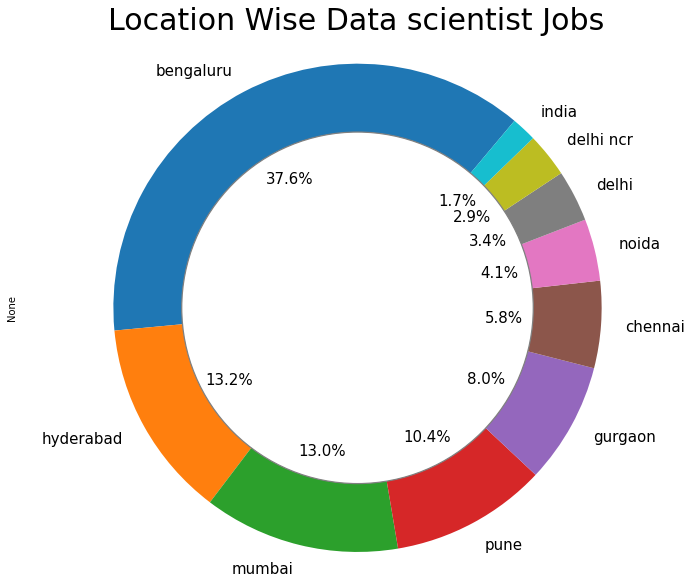

In [ ]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

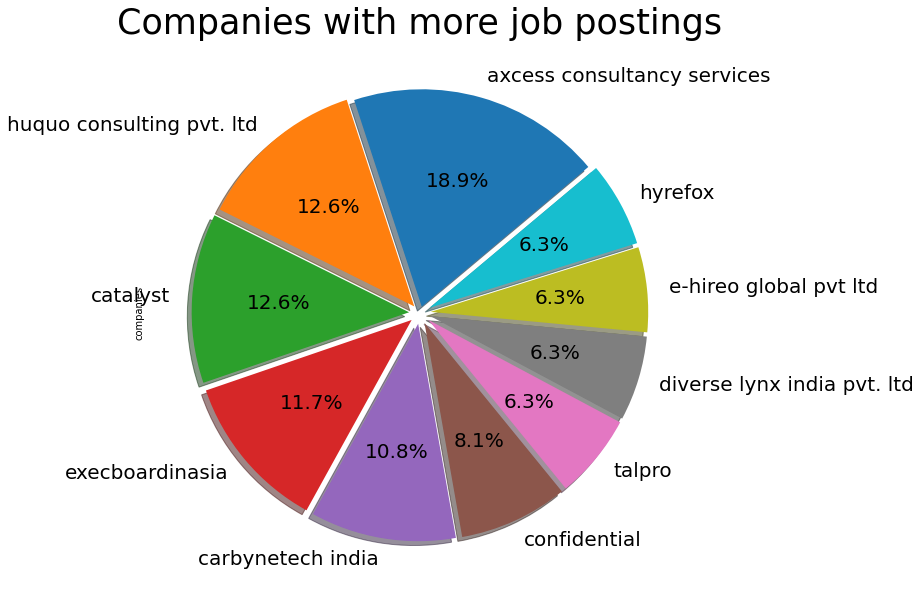

In [ ]:
DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

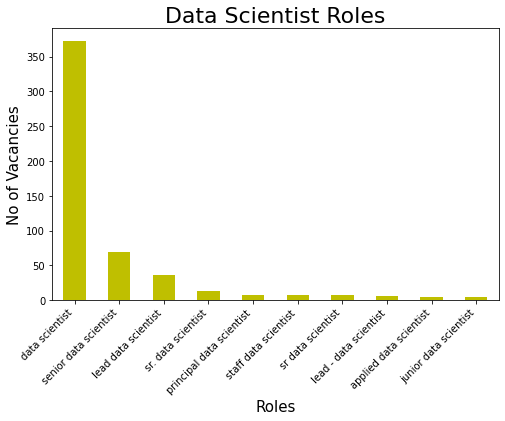

In [ ]:
### Roles
DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

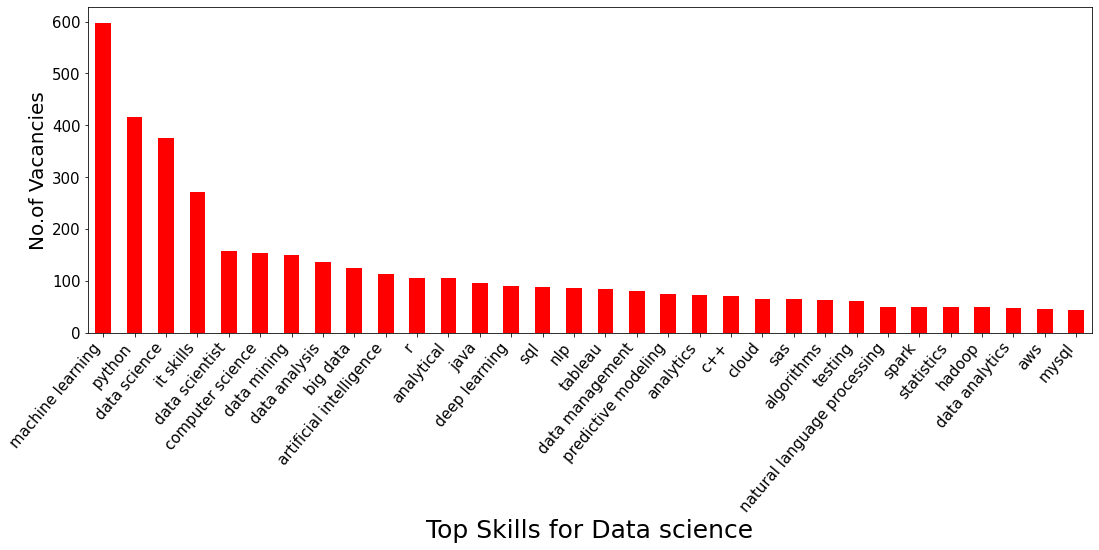

In [ ]:
DS_jobs_df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

In [ ]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for preo processing
jj=pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["skills","count"]
jj.head()

,skills,count
0,machine learning,598
1,python,416
2,data science,375
3,it skills,271
4,data scientist,158


In [ ]:
#lets first find the top skills for Data science in general
datascience={}
datascience['statistics']=jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=jj["count"][jj['skills'].str.contains('big', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'big_data': 142,
 'computer_vision': 36,
 'data_analysis': 219,
 'data_mining': 183,
 'deep_learning': 91,
 'machine_learning': 626,
 'nlp': 148,
 'statistics': 160}

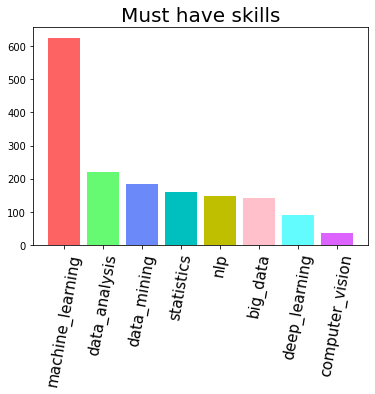

In [ ]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

In [ ]:
languages={}
languages["python"]=jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"]=jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

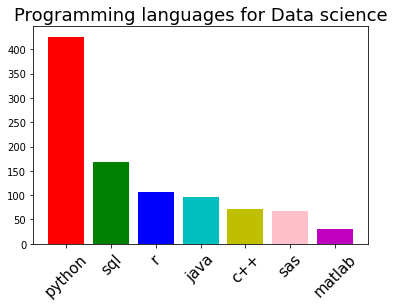

In [ ]:
plt.bar(languages.keys(),languages.values(),color=["r","g","b","c","y","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

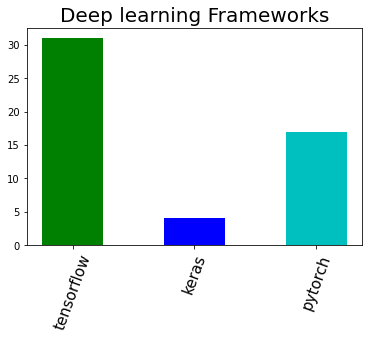

In [ ]:
frameworks={}
frameworks['tensorflow']=jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()


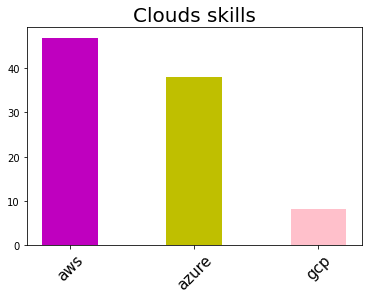

In [ ]:
#lcloud skills required
cloud={}
cloud['aws']=jj["count"][jj['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=jj["count"][jj['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=jj["count"][jj['skills'].str.contains('gcp')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["m","y","pink"],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds skills",fontsize=20)
plt.show()

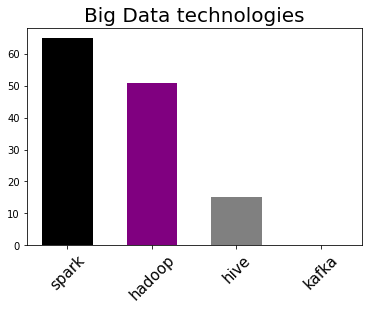

In [ ]:
bigdata={}
bigdata["spark"]=jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

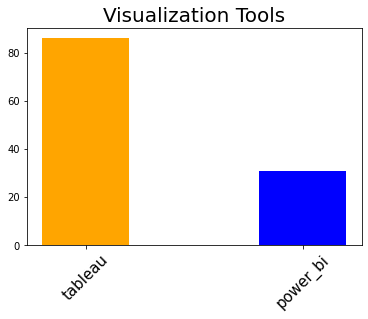

In [ ]:
# tools
tools={}
tools["tableau"]=jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()
